In [24]:
import astunparse

from moa.frontend import parse
from moa.visualize import visualize_ast, print_ast
from moa.shape import calculate_shapes
from moa.reduction import reduce_ast
from moa.backend import generate_python_source
from moa.backend.backend import add_function_node

# Frontend

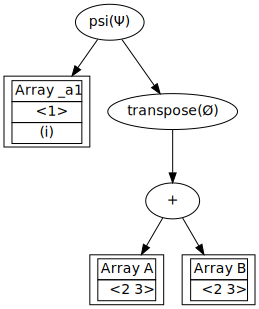

In [25]:
symbol_table, tree = parse('<i> psi (tran(A ^ <2 3> + B ^ <2 3>))')
visualize_ast(symbol_table, tree)

# Shape Analysis

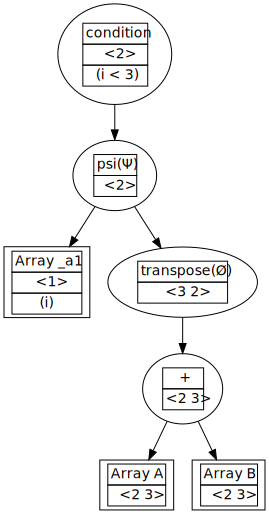

In [26]:
shape_symbol_table, shape_tree = calculate_shapes(symbol_table, tree)
visualize_ast(shape_symbol_table, shape_tree)

# Reduction to Denotational Normalized Format (DNF)

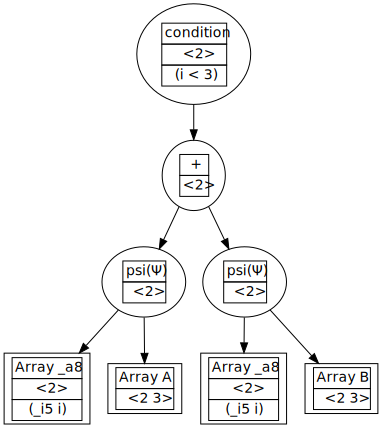

In [27]:
dnf_symbol_table, dnf_tree = reduce_ast(shape_symbol_table, shape_tree)
visualize_ast(dnf_symbol_table, dnf_tree)

# Reduction to ONF

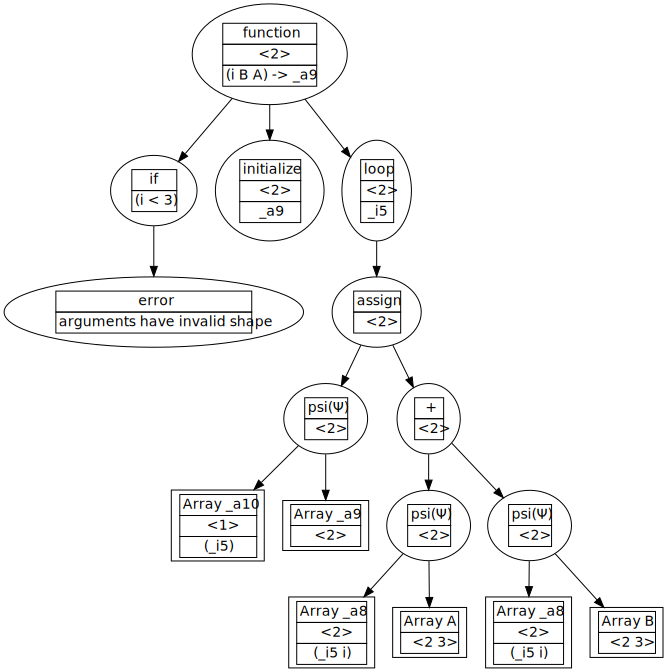

In [28]:
onf_symbol_table, onf_tree = add_function_node(dnf_symbol_table, dnf_tree)
visualize_ast(onf_symbol_table, onf_tree)

# Backend (Python)

Execute generated python source

In [29]:
source = generate_python_source(onf_symbol_table, onf_tree, materialize_scalars=True)
print(source)



def f(i, B, A):
    
    pass
    
    _a9 = Array((2,))
    
    for _i5 in range(0, 2):
        
        _a9[(_i5,)] = (A[(_i5, i)] + B[(_i5, i)])
    return _a9


In [30]:
exec(source)

In [31]:
from moa.array import Array

In [32]:
A = Array((2, 3), (1, 2, 3, 4, 5, 6))
B = Array((2, 3), (7, 8, 9, 10, 11, 12))
C = Array((2, 3), (13, 14, 15, 16, 17, 18))

v = f(1, B, A)

In [33]:
v.shape

(2,)

In [34]:
v.value

[10, 16]